# Unsupervised Clustering Techniques

In [ ]:
%pip install -r requirements.txt

In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math as m
import scipy
import mpl_toolkits.mplot3d.axes3d as axes3d
from matplotlib.pyplot import legend
#Warning
import warnings
warnings.filterwarnings('ignore')
#Importint the module we created
import unsp_algorithms as unsp

### Dataset

In [2]:
data = pd.read_csv('MatrizdeFrecuenciaVectorizer_Stemming_Word.csv')
label_super=data['clase_cluster']
data.drop(['clase_cluster'], axis=1, inplace=True)
data=unsp.normalize(data)
data

,adecu,adult,aere,aeropuert,alejandr,alter,am,ambulatori,amplitud,anatom,...,siluet,taman,tej,telefon,telefonos,traque,universitari,vasculatur,vered,via
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.866892,...,0.000000,0.000000,0.000000,0.866892,0.000000,0.660564,0.866892,0.00000,0.000000,0.000000
1,0.779393,0.000000,0.000000,0.000000,0.527316,0.400576,0.651885,0.0,0.0,0.620668,...,0.000000,0.000000,0.499833,0.620668,0.000000,0.472944,0.620668,0.00000,0.000000,0.000000
2,0.000000,0.000000,0.773991,0.000000,0.000000,0.000000,0.296501,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.564606,0.000000,0.000000,0.564606,0.00000,0.000000,0.778436
3,0.492174,0.000000,0.000000,0.000000,0.665983,0.505914,0.411655,0.0,0.0,0.783884,...,0.000000,0.000000,0.631273,0.783884,0.000000,0.597312,0.783884,0.00000,0.000000,0.000000
4,0.000000,0.000000,0.430117,0.000000,0.000000,0.000000,0.659078,0.0,0.0,0.000000,...,0.372184,0.328822,0.000000,0.627517,0.000000,0.478163,0.627517,0.00000,0.000000,0.432587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
801,0.000000,0.609140,0.000000,0.757576,0.000000,0.000000,0.613539,0.0,0.0,0.000000,...,0.346468,0.306102,0.000000,0.000000,0.757576,0.445124,0.000000,0.00000,0.757576,0.402697
802,0.000000,0.564260,0.000000,0.701759,0.000000,0.000000,0.284168,0.0,0.0,0.000000,...,0.320940,0.283549,0.000000,0.000000,0.701759,0.412328,0.000000,0.68817,0.701759,0.373027
803,0.000000,0.613683,0.000000,0.763226,1.000000,0.379825,0.618116,0.0,0.0,0.588516,...,0.000000,0.000000,0.473940,0.000000,0.763226,0.448444,0.000000,0.00000,0.763226,0.405701
804,0.000000,0.000000,0.000000,0.907270,0.000000,0.000000,0.367386,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.907270,0.533079,0.000000,0.00000,0.907270,0.482269


## Aprendizaje 1

Aprender los datos usando tecnicas de agrupamiento en elespacio de altas dimensiones

##### k-means algorithm

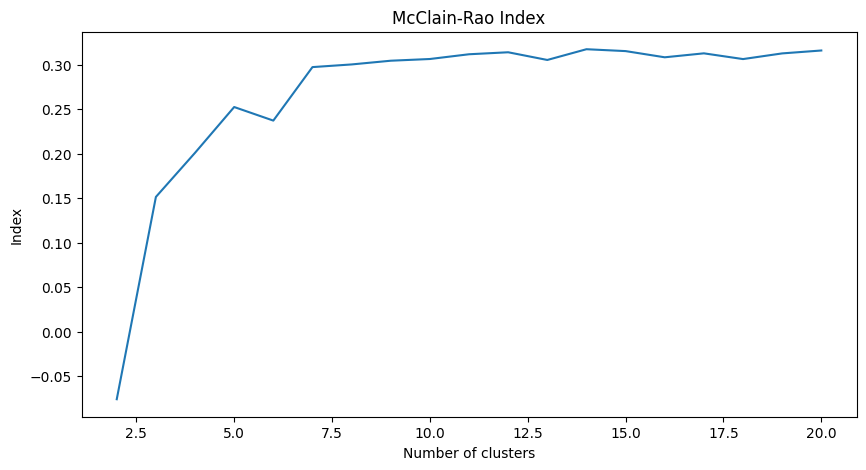

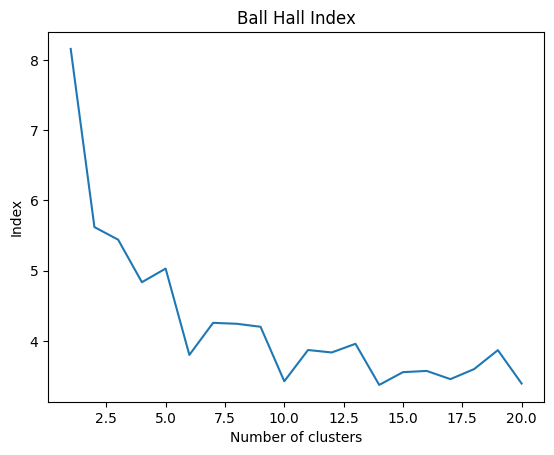

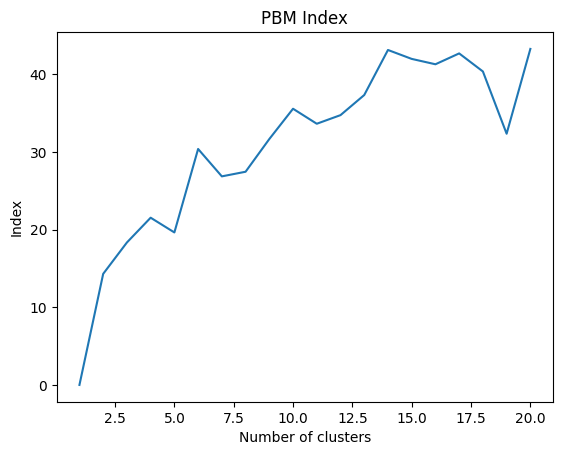

In [4]:
#Fiding the best number of clusters using the elbow method with different metrics
ks=np.linspace(1,20,20)
McClainRidx=[]
BallHallIdx=[]
PBM_idx=[]
for k in ks:
    centroids, clusters, cost = unsp.kmeans(data.values, int(k), metric='euclidean')
    M,B,P=unsp.calcIndices(data.values, clusters)
    McClainRidx.append(M)
    BallHallIdx.append(B)
    PBM_idx.append(P)


#Plotting the results
plt.figure(figsize=(10,5))
plt.plot(ks, McClainRidx, label='McClainRidx')
plt.title('McClain-Rao Index')
plt.xlabel('Number of clusters')
plt.ylabel('Index')
plt.show()
plt.plot(ks, BallHallIdx, label='Ball Hall Index')
plt.title('Ball Hall Index')
plt.xlabel('Number of clusters')
plt.ylabel('Index')
plt.show()
plt.plot(ks, PBM_idx, label='PBM Index')
plt.title('PBM Index')
plt.xlabel('Number of clusters')
plt.ylabel('Index')
plt.show()


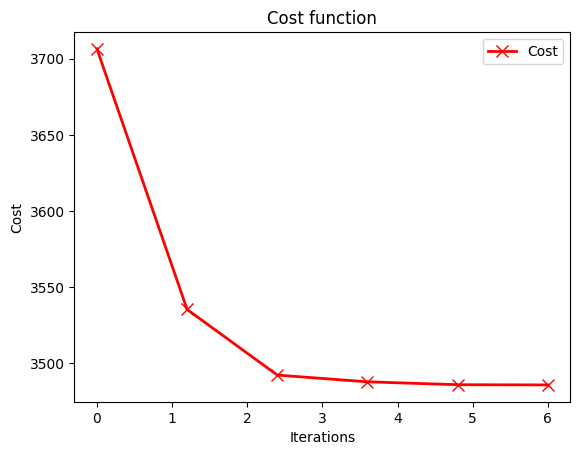

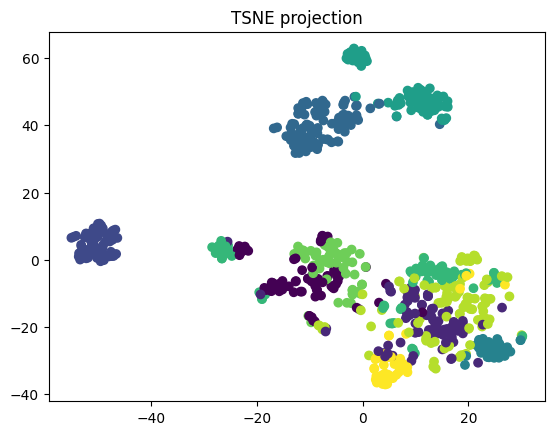

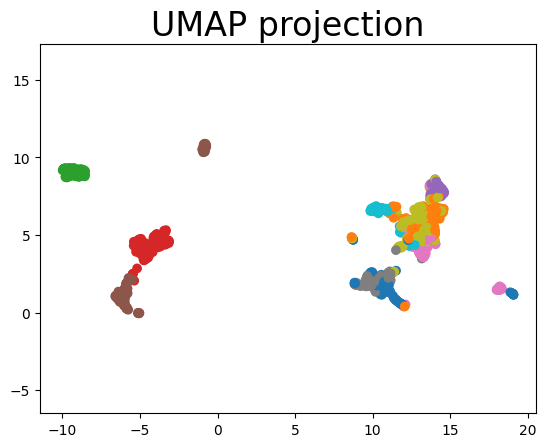

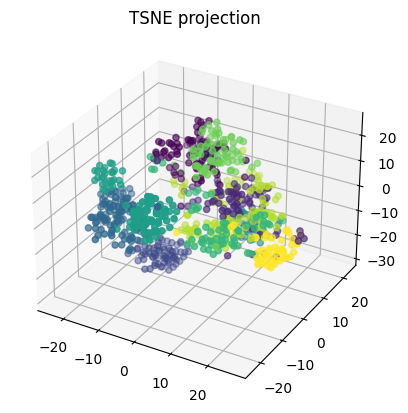

array([[ -0.15018727,   2.6607554 ,  21.274633  ],
       [-10.36813   ,  18.851448  ,   9.829571  ],
       [ -3.368432  ,   8.987338  ,  23.759441  ],
       ...,
       [-14.372572  , -13.416802  ,  13.871205  ],
       [-13.032838  , -10.645617  ,  -7.8577013 ],
       [-10.833455  ,   2.0617745 , -20.100245  ]], dtype=float32)

In [6]:
centroids, clusters, cost =unsp.kmeans(data.values, 10, metric='euclidean')
plt.plot(np.linspace(0,len(cost),len(cost)),cost, 'bx-', color='red', label='Cost', linewidth=2, markersize=8)
plt.title('Cost function')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.show()

#Proyection of the data in 2D using tse and umap
#2D tse
unsp.tsne_manifold(data, 2, 30, 200, c=clusters)
#2D umap
unsp.umap_projection(data.values, clusters)
#3D tse
unsp.tsne_manifold(data, 3, 30, 200, c=clusters)

##### Fuzzy-c means algorithm

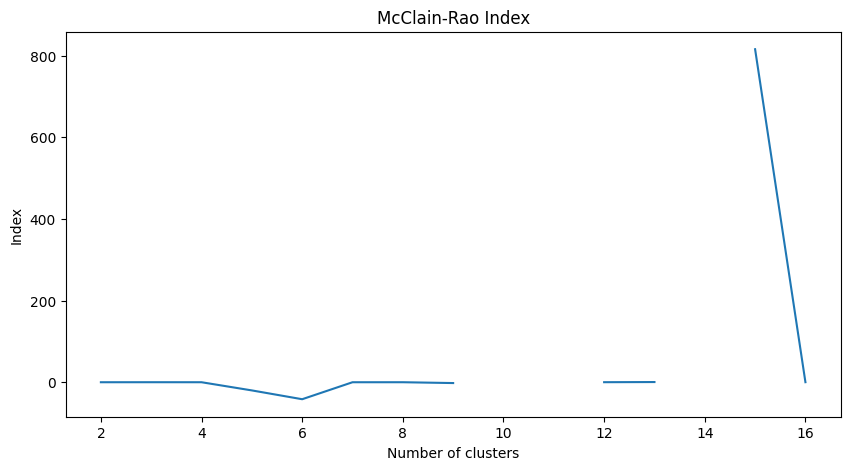

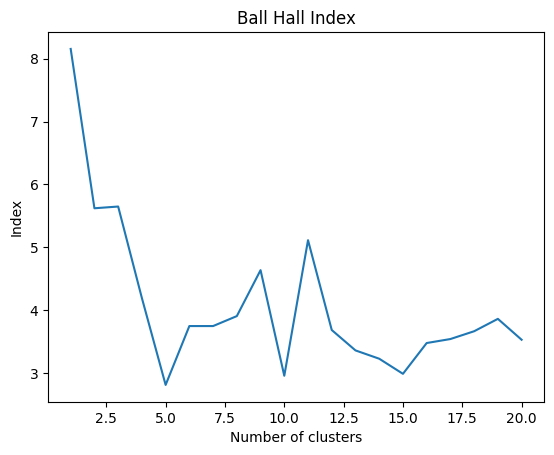

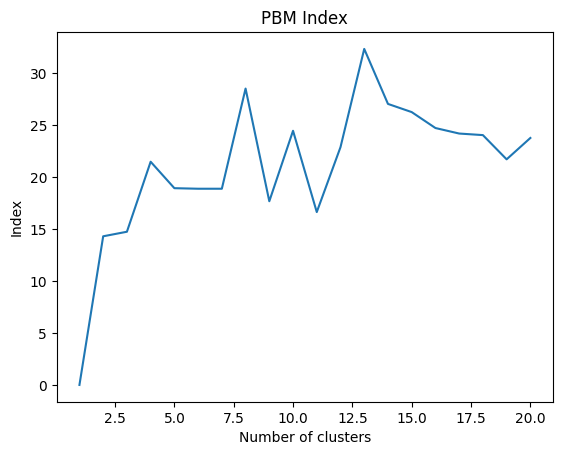

In [5]:
#Fiding the best number of clusters using the elbow method with different metrics
ks=np.linspace(1,20,20)
McClainRidx=[]
BallHallIdx=[]
PBM_idx=[]
for k in ks:
    centroids, U, cost= unsp.fuzzy_cmeans(data.values, int(k), 2, 0.001)
    clusters=np.argmax(U, axis=1)
    M,B,P=unsp.calcIndices(data.values, clusters)
    McClainRidx.append(M)
    BallHallIdx.append(B)
    PBM_idx.append(P)


#Plotting the results
plt.figure(figsize=(10,5))
plt.plot(ks, McClainRidx, label='McClainRidx')
plt.title('McClain-Rao Index')
plt.xlabel('Number of clusters')
plt.ylabel('Index')
plt.show()
plt.plot(ks, BallHallIdx, label='Ball Hall Index')
plt.title('Ball Hall Index')
plt.xlabel('Number of clusters')
plt.ylabel('Index')
plt.show()
plt.plot(ks, PBM_idx, label='PBM Index')
plt.title('PBM Index')
plt.xlabel('Number of clusters')
plt.ylabel('Index')
plt.show()

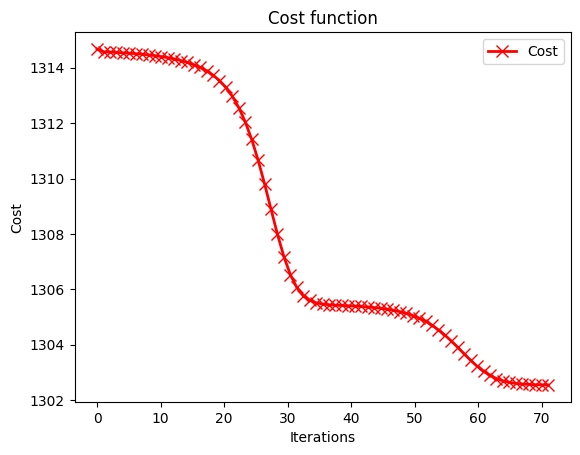

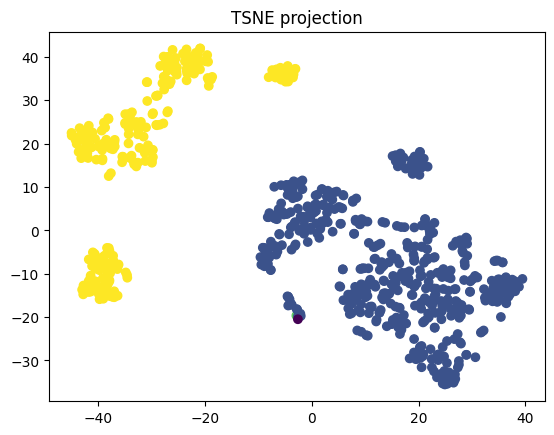

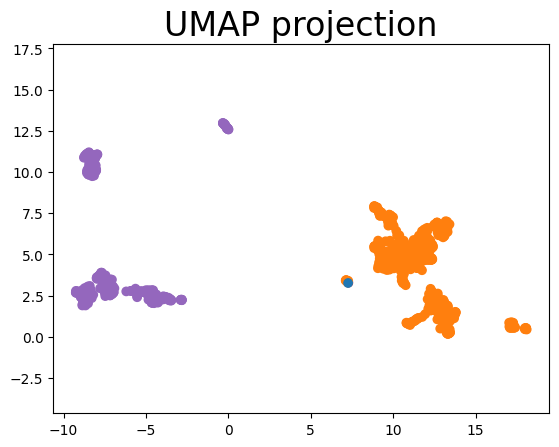

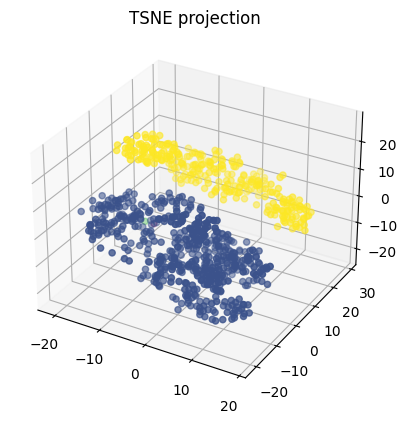

array([[-15.41018   ,  -6.8221445 ,  -2.0922527 ],
       [  0.94255763, -12.133393  ,  13.682702  ],
       [-15.427262  ,  -2.5121932 ,   4.043436  ],
       ...,
       [  1.1958034 ,  25.013054  ,   3.56278   ],
       [ -3.600436  ,  16.225098  ,  15.553284  ],
       [-10.576098  ,   2.9814618 ,  24.566473  ]], dtype=float32)

In [4]:
centroids, U, cost= unsp.fuzzy_cmeans(data.values, 5, 2, 0.001)
clusters=np.argmax(U, axis=1)
plt.plot(np.linspace(0,len(cost),len(cost)),cost, 'bx-', color='red', label='Cost', linewidth=2, markersize=8)
plt.title('Cost function')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.show()

#Proyection of the data in 2D using tse and umap
#2D tse
unsp.tsne_manifold(data, 2, 30, 200, c=clusters)
#2D umap
unsp.umap_projection(data.values, clusters)
#3D tse
unsp.tsne_manifold(data, 3, 30, 200, c=clusters)

##### Mountain clustering

Cluster  1  center:  [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
Cluster  1  density:  2.6165107434777943e-05
Cluster  2  center:  [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1.0, 0.5]
Cluster  2  density:  1.0472297689532022e-05
Cluster  3  center:  [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1.0]
Cluster  3  density:  2.8691939141217353e-06
Cluster  4  center:  [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1.0, 1.0]
Cluster  4  density:  1.1483634406078808e-06
Cluster  5  center:  [0.5, 1.0, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1.0, 1.0]
Cluster  5  density:  1.3755914743828137e-07


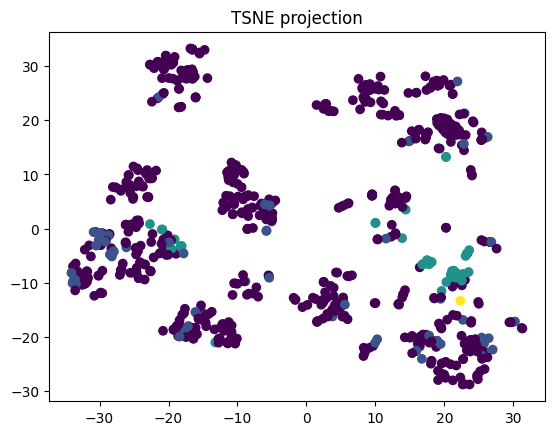

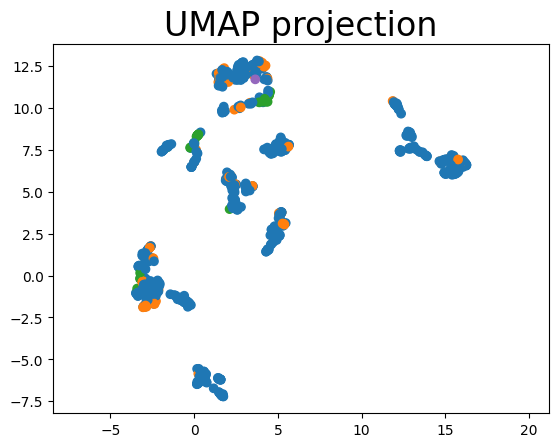

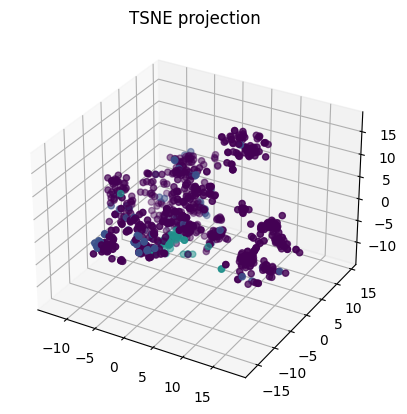

array([[13.4474    , -1.9988614 ,  2.8551145 ],
       [14.32776   , -2.5570917 ,  0.9343233 ],
       [-9.0730095 , -4.5477424 ,  3.931576  ],
       ...,
       [ 8.434928  , -3.4072711 , -6.1396155 ],
       [-7.6542883 , -0.40764642,  4.276289  ],
       [ 3.95087   ,  3.8528812 , 14.711329  ]], dtype=float32)

In [17]:

data_sub=data[['ambulatori','amplitud','angul','aortic','atelectasi','bilateral','bronqui','cardiomegali','cardiotorac','derech','izquierd','intersticial','lateral','via']]
n=14
gr=2
kn=5
sigma = [0.1,0.2,0.2,0.2,0.2]
clusters,center=unsp.mountain_clustering(n,gr,data_sub.values,sigma,kn)


#Proyection of the data in 2D using tse and umap
#2D tse
unsp.tsne_manifold(data_sub, 2, 30, 200, c=clusters)
#2D umap
unsp.umap_projection(data_sub.values, clusters)
#3D tse
unsp.tsne_manifold(data_sub, 3, 30, 200, c=clusters)


In [30]:
#Get n random numbers between a and b
def get_random_numbers(n, a, b):
    return np.floor(np.random.uniform(a,b,n))
r=get_random_numbers(20, 0, 130)


Cluster  1  center:  [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
Cluster  1  density:  1.9567905090594272e-06
Cluster  2  center:  [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1.0, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
Cluster  2  density:  5.120367925923246e-07
Cluster  3  center:  [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1.0, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
Cluster  3  density:  4.4473867417976634e-07
Cluster  4  center:  [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1.0, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
Cluster  4  density:  3.903667490733424e-07
Cluster  5  center:  [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1.0, 0.5, 0.5, 0.5, 0.5, 0.5]
Cluster  5  density:  2.8720335496977794e-07


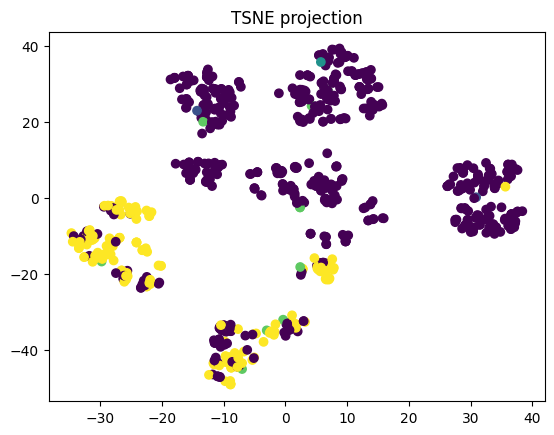

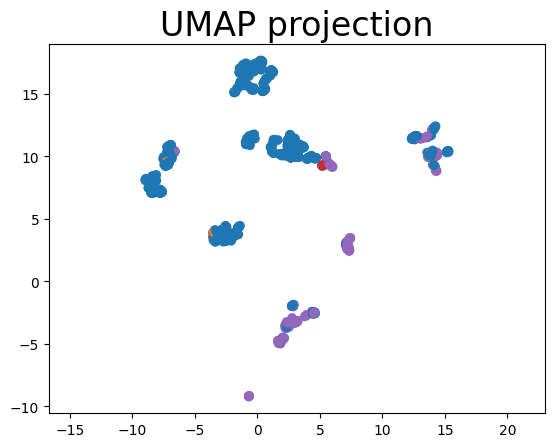

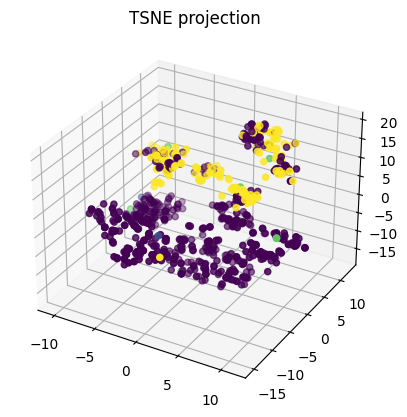

array([[ -2.5045314 ,  -8.681611  ,   3.7453341 ],
       [ -2.7856607 ,  -7.9084725 ,  -1.7706203 ],
       [ -2.8091197 , -13.2209015 ,  -0.10971869],
       ...,
       [  3.621065  ,   7.923037  ,  13.957008  ],
       [ -0.7742408 ,   5.956871  ,   6.726997  ],
       [ -2.76686   ,  -1.533467  ,  10.866268  ]], dtype=float32)

In [31]:
data_sub=data.iloc[:,r.astype(int)]
n=20
gr=2
kn=5
sigma = [0.1,0.2,0.2,0.2,0.2]
clusters,center=unsp.mountain_clustering(n,gr,data_sub.values,sigma,kn)


#Proyection of the data in 2D using tse and umap
#2D tse
unsp.tsne_manifold(data_sub, 2, 30, 200, c=clusters)
#2D umap
unsp.umap_projection(data_sub.values, clusters)
#3D tse
unsp.tsne_manifold(data_sub, 3, 30, 200, c=clusters)

##### Substractive Algorithm

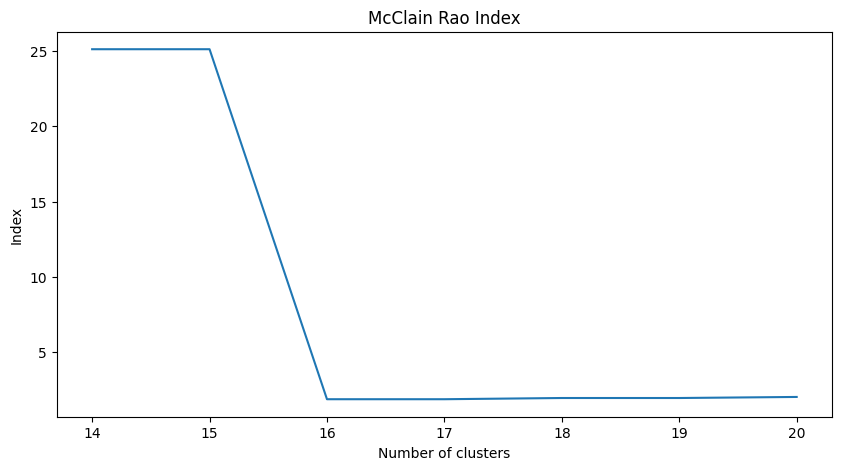

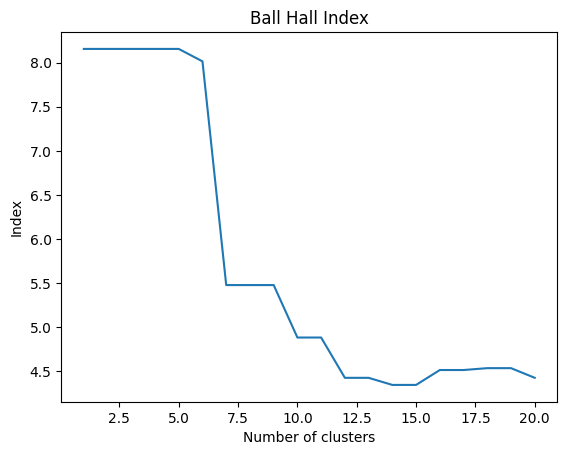

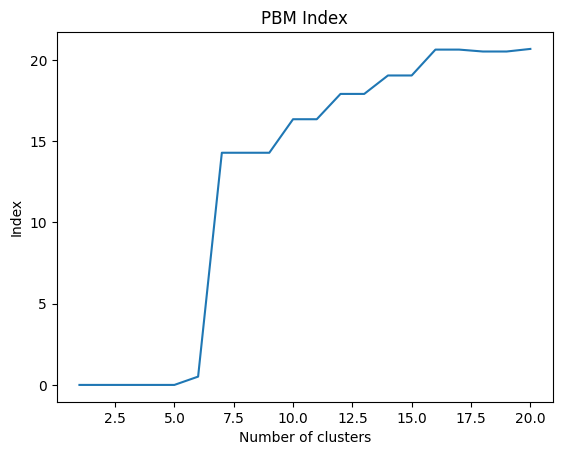

In [7]:
r_a=0.1
r_b=1.5*r_a

ks=np.linspace(1,20,20)
McClainRidx=[]
BallHallIdx=[]
PBM_idx=[]
for k in ks:
    clusters,centers=unsp.subtractive_clustering(r_a,r_b,data,int(k))
    M,B,P=unsp.calcIndices(data.values, clusters)
    McClainRidx.append(M)
    BallHallIdx.append(B)
    PBM_idx.append(P)


#Plotting the results
plt.figure(figsize=(10,5))
plt.plot(ks, McClainRidx, label='McClain Rao Index')
plt.title('McClain Rao Index')
plt.xlabel('Number of clusters')
plt.ylabel('Index')
plt.show()
plt.plot(ks, BallHallIdx, label='Ball Hall Index')
plt.title('Ball Hall Index')
plt.xlabel('Number of clusters')
plt.ylabel('Index')
plt.show()
plt.plot(ks, PBM_idx, label='PBM Index')
plt.title('PBM Index')
plt.xlabel('Number of clusters')
plt.ylabel('Index')
plt.show()

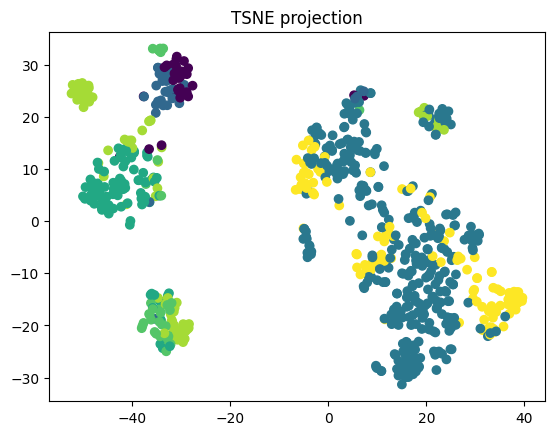

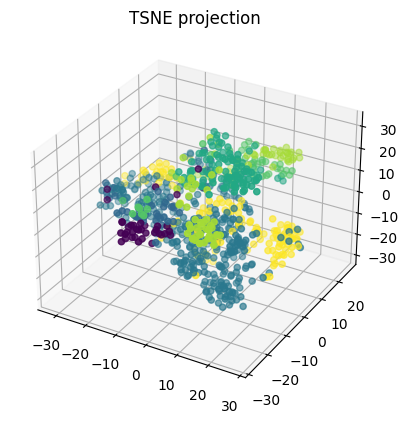

array([[-23.67707  ,   2.9945235,   4.2694936],
       [-13.974694 ,  19.245354 ,  -5.1539454],
       [-31.0357   ,   3.5191555,  -4.698724 ],
       ...,
       [  7.031068 , -16.820568 ,   9.646663 ],
       [  3.6480312,   4.401079 ,  28.529148 ],
       [  7.9081287,  16.206858 ,   8.353416 ]], dtype=float32)

In [5]:
r_a=0.1
r_b=1.5*r_a
clusters,centers=unsp.subtractive_clustering(r_a,r_b,data,16)

#Proyection of the data in 2D using tse and umap
#2D tse
unsp.tsne_manifold(data, 2, 30, 200, c=clusters)
#2D umap
# unsp.umap_projection(data.values, clusters)
#3D tse
unsp.tsne_manifold(data, 3, 30, 200, c=clusters)

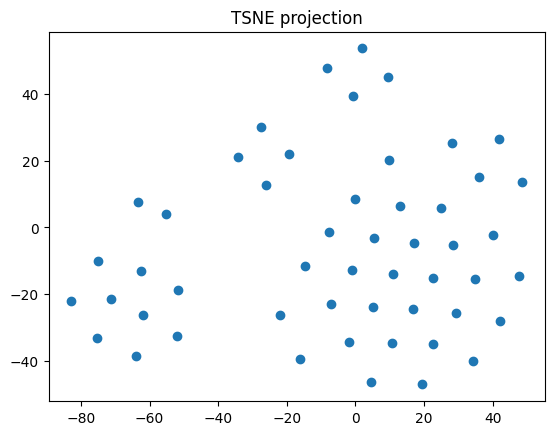

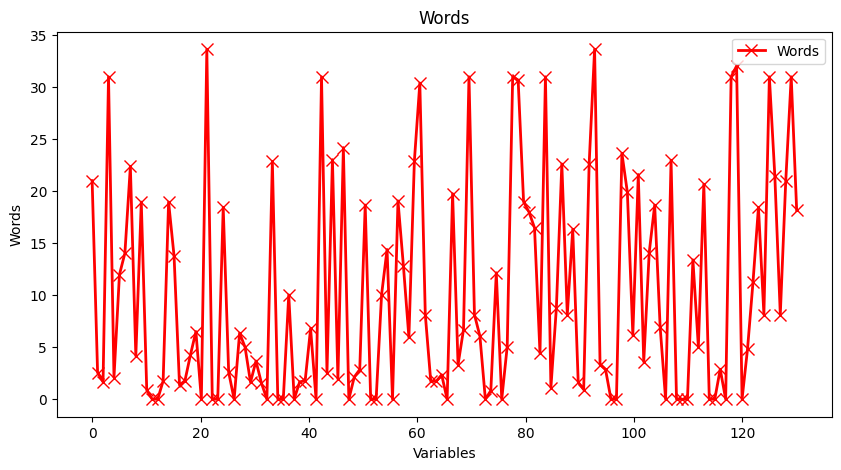

In [13]:
#See which registers are the centers
#See which registers are equal to each center
registers=[]
for i in range(len(centers)):
    for j in range(len(data)):
        if np.array_equal(data.iloc[j,:],centers[i]):
            registers.append(j)
            # print(j)

#Subset of the data with the registers
data_sub=data.iloc[registers,:]
#Proyection of the data in 2D using tse and umap
#2D tse
unsp.tsne_manifold(data_sub, 2, 30, 200)

#to sum every column of the data and plot the result for every variable
sums=[]
for i in range(len(data.columns)):
    sums.append(data_sub.iloc[:,i].sum())
plt.figure(figsize=(10,5))
plt.plot(np.linspace(0,len(sums),len(sums)),sums, 'bx-', color='red', label='Words', linewidth=2, markersize=8)
plt.title('Words')
plt.xlabel('Variables')
plt.ylabel('Words')
plt.legend()
plt.show()


In [17]:
#To get the variables with the higher sum 
#Get the indexes of the variables with the higher sum
indexes=np.argsort(sums)
#Get the variables with the higher sum
variables=[]
for i in range(len(indexes)):
    variables.append(data_sub.columns[indexes[i]])

print(variables[0:13])
#Printing last 13 variables
print(variables[-13:])

['basal', 'principal', 'calcific', 'predomini', 'resident', 'bilateral', 'radiologi', 'sign', 'aument', 'cardiomegali', 'dorsal', 'carl', 'castrillon']
['extension', 'lateral', 'vered', 'imagenescentrosespecializ', 'km', 'convencion', 'telefonos', 'llanogrand', 'aeropuert', 'rionegr', 'rm', 'oblicu', 'bari']


##### Agglomerative clustering

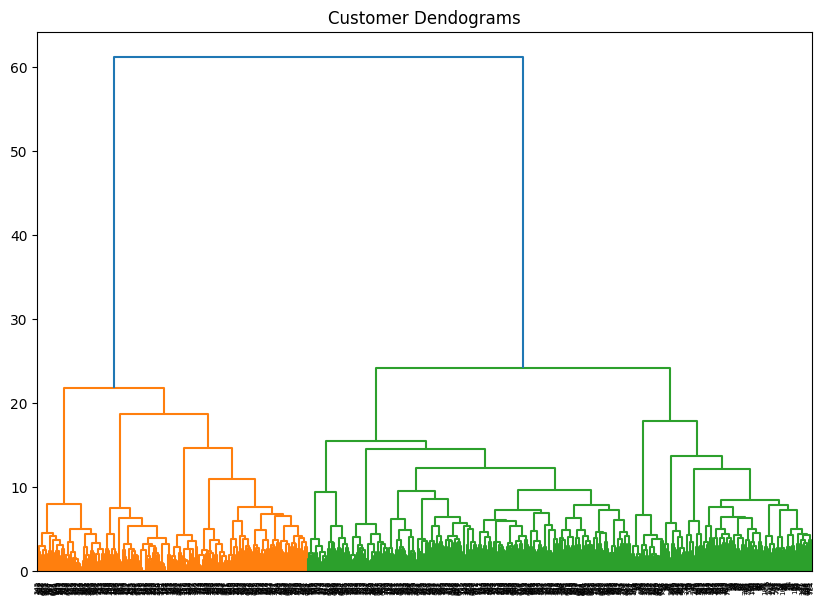

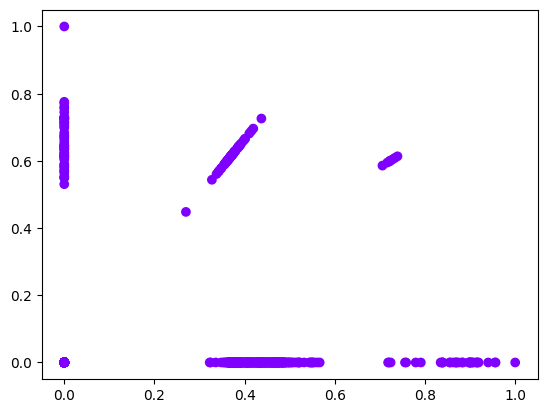

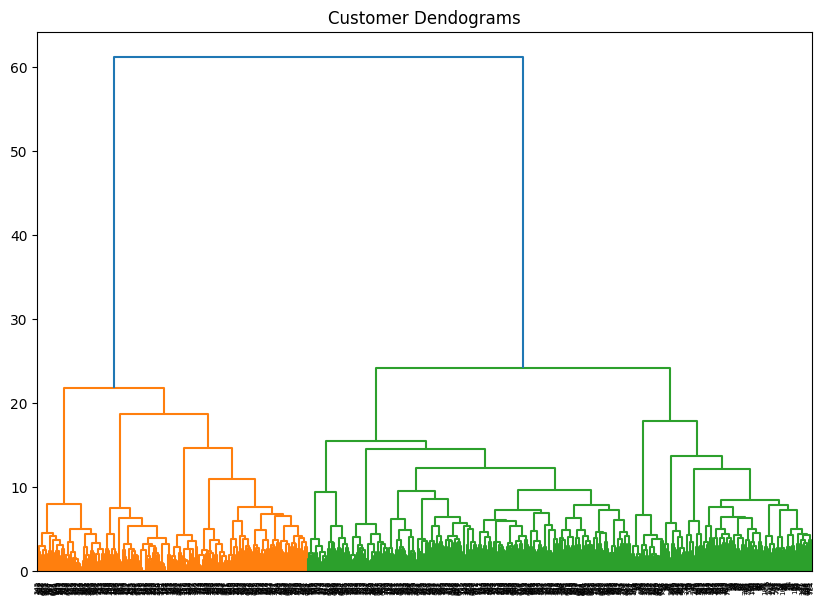

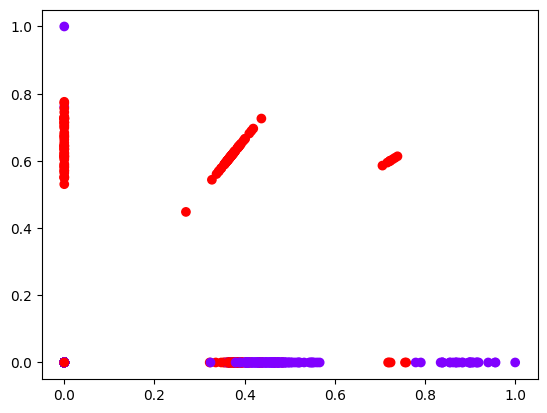

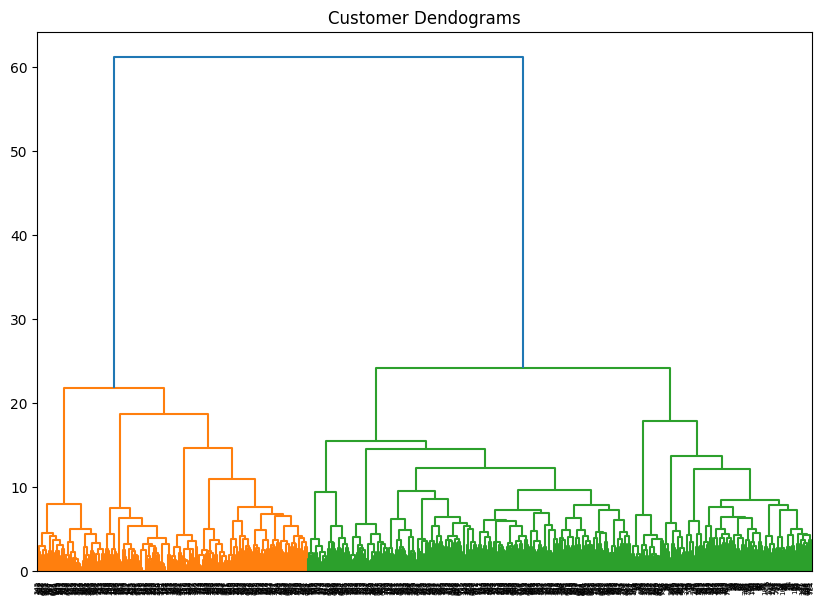

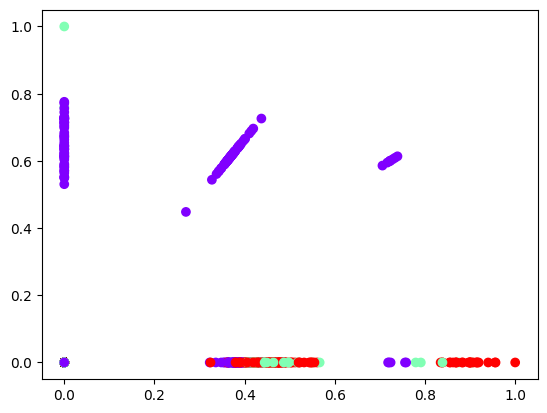

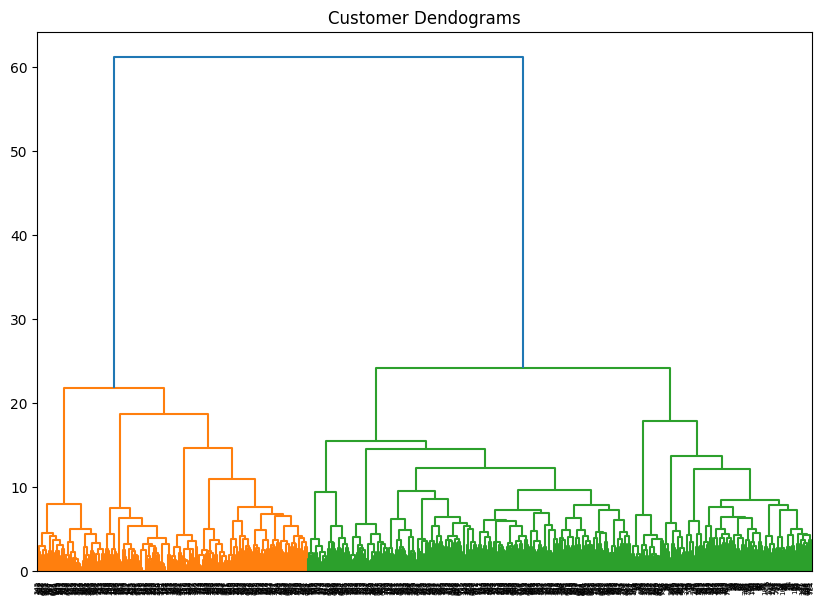

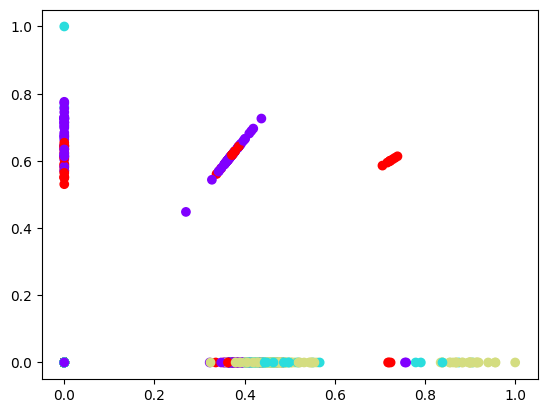

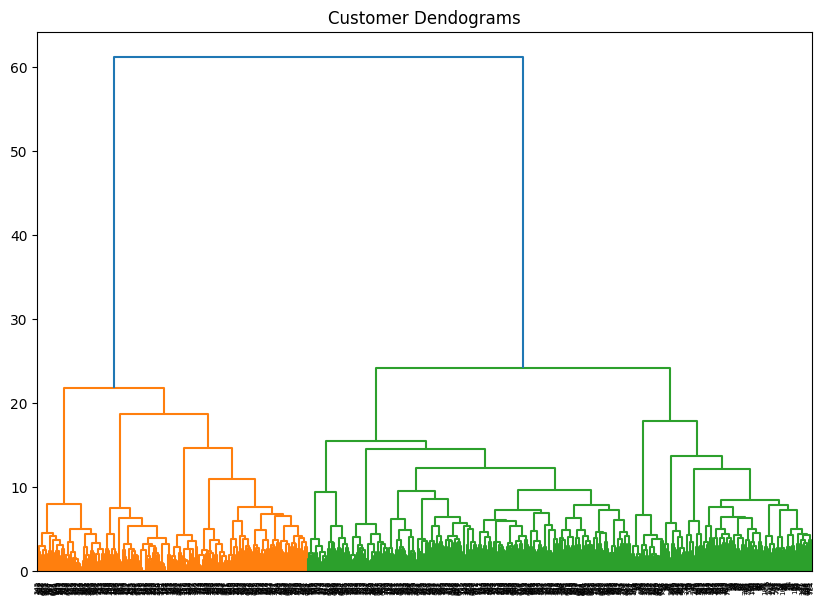

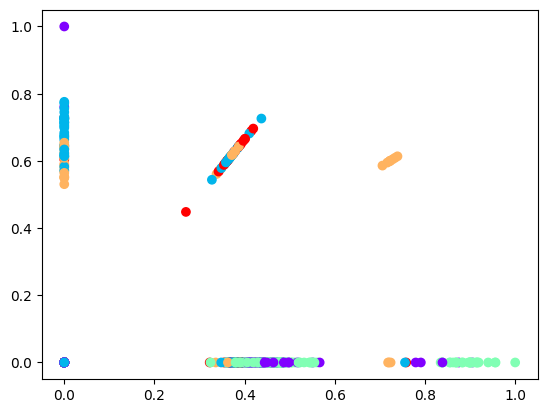

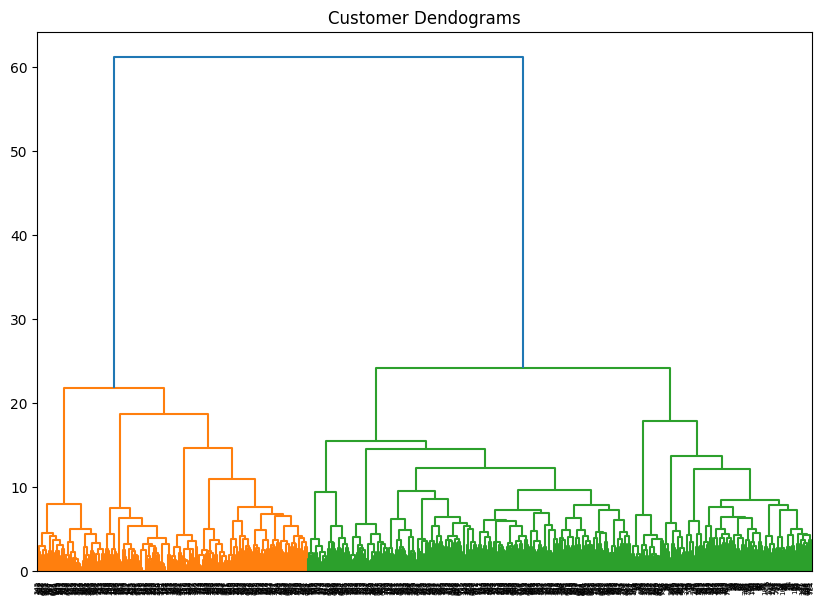

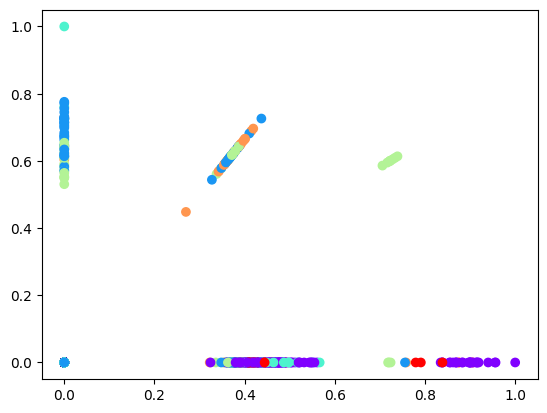

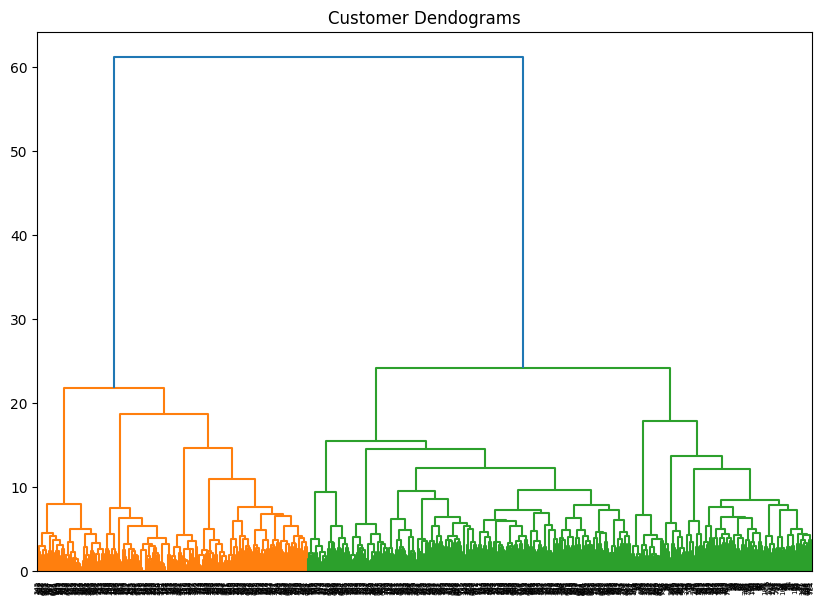

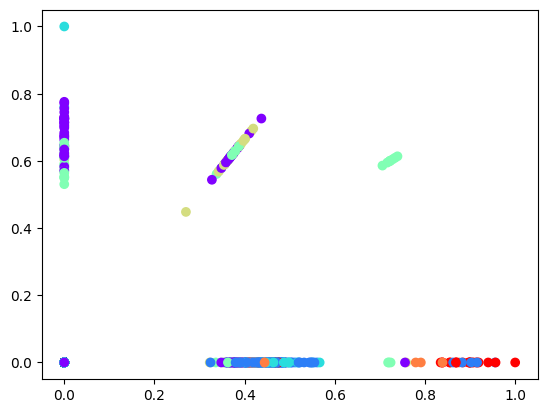

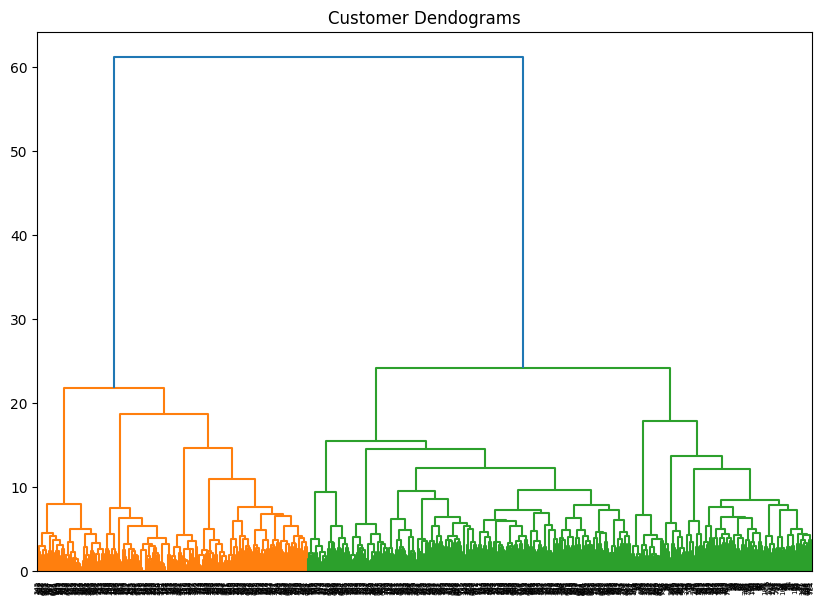

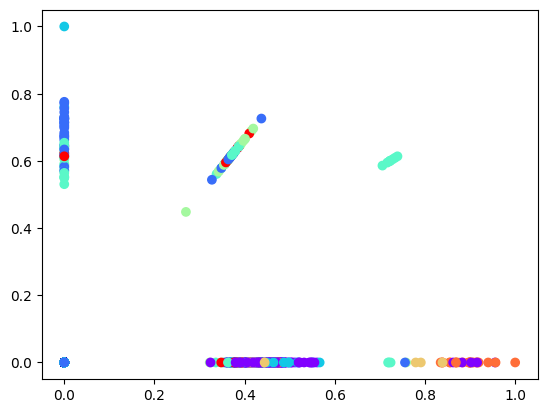

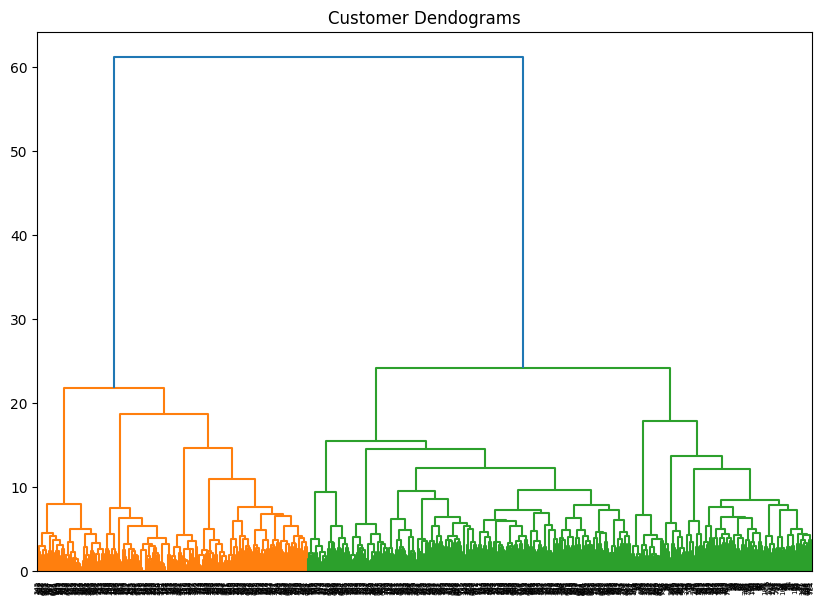

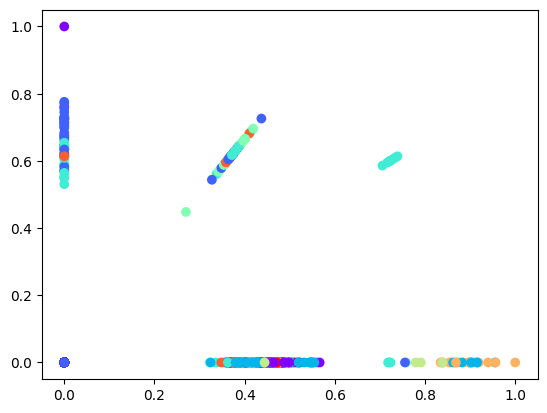

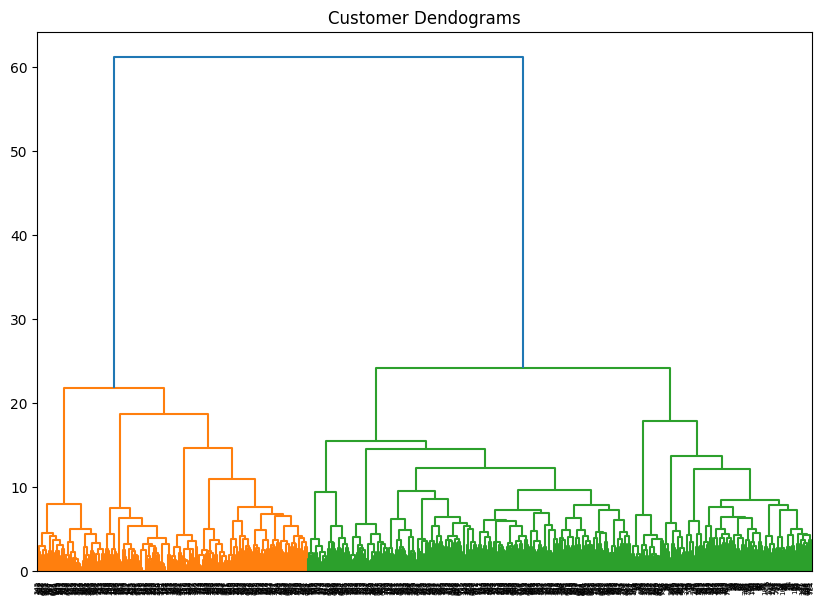

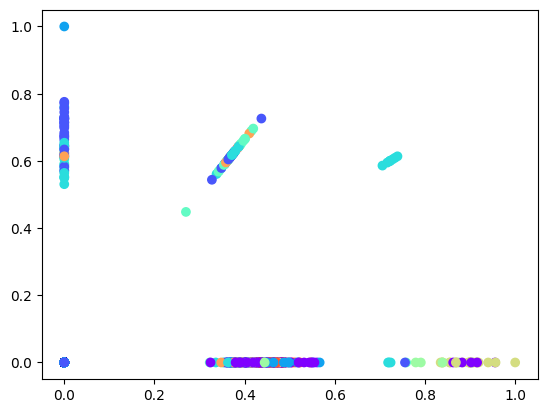

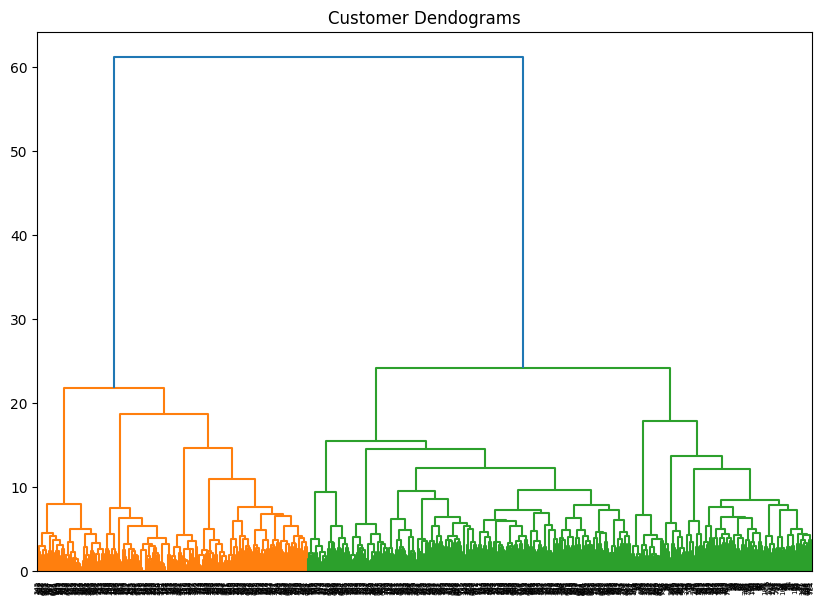

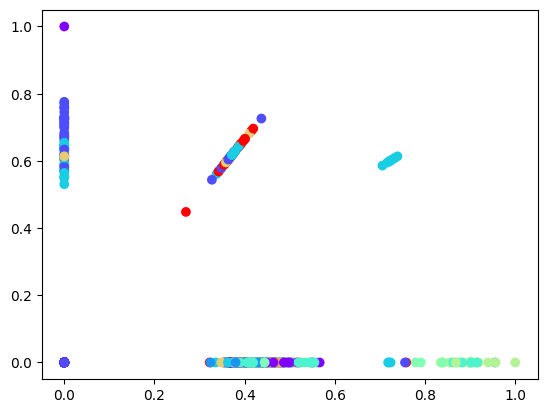

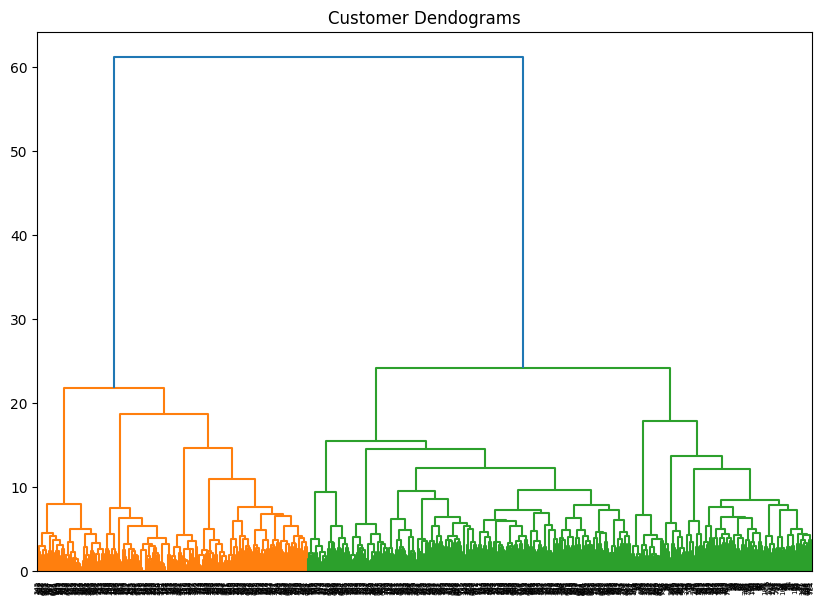

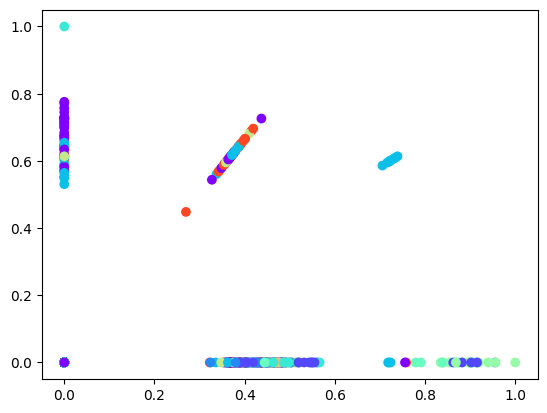

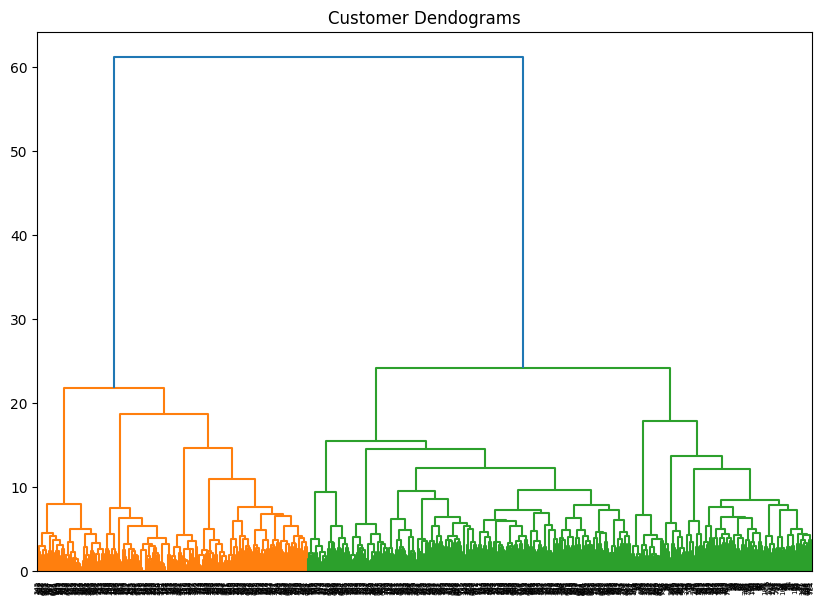

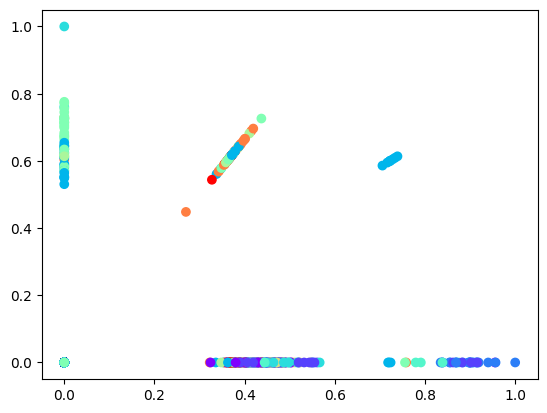

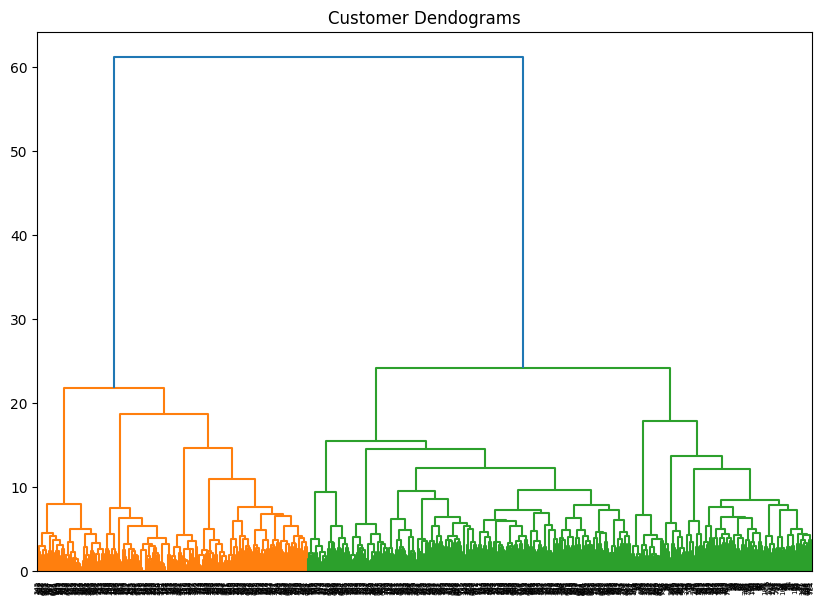

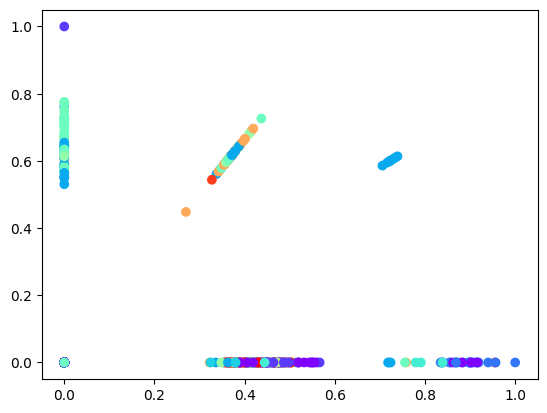

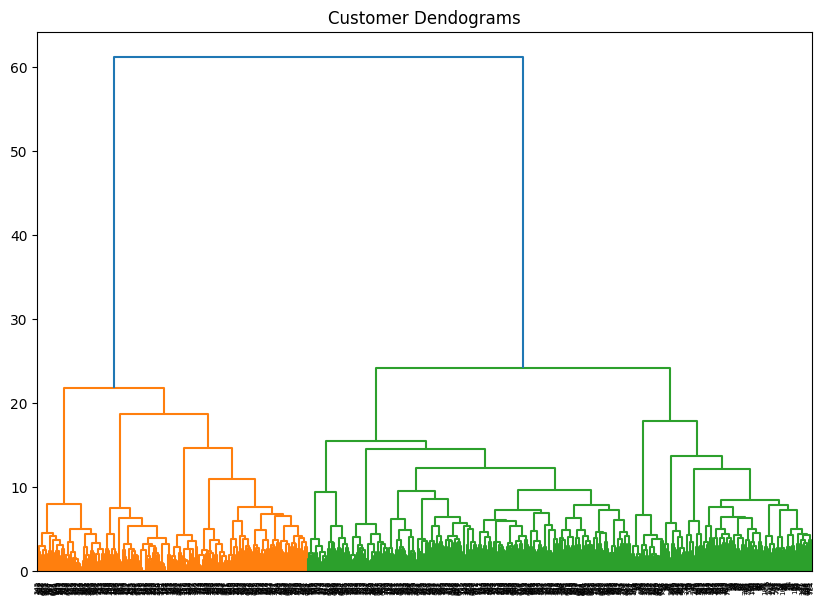

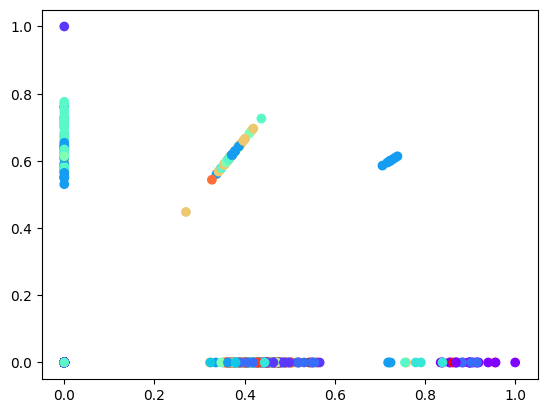

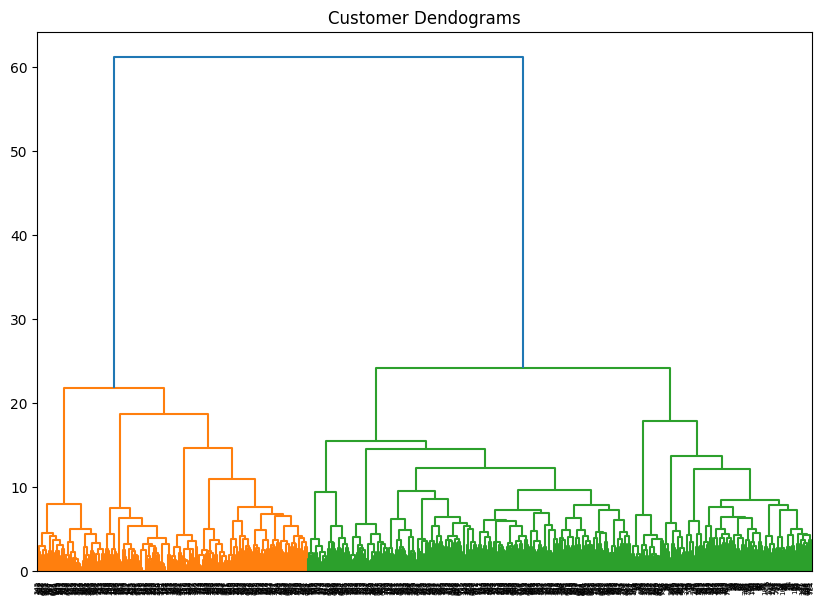

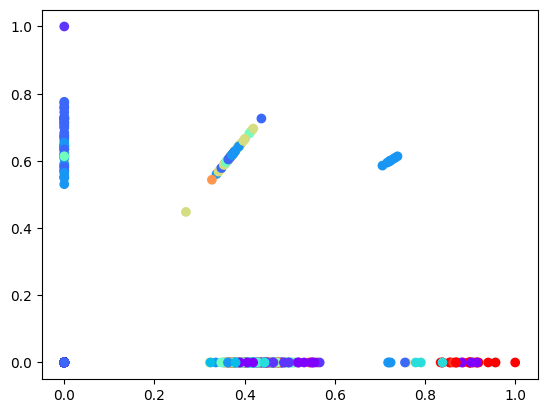

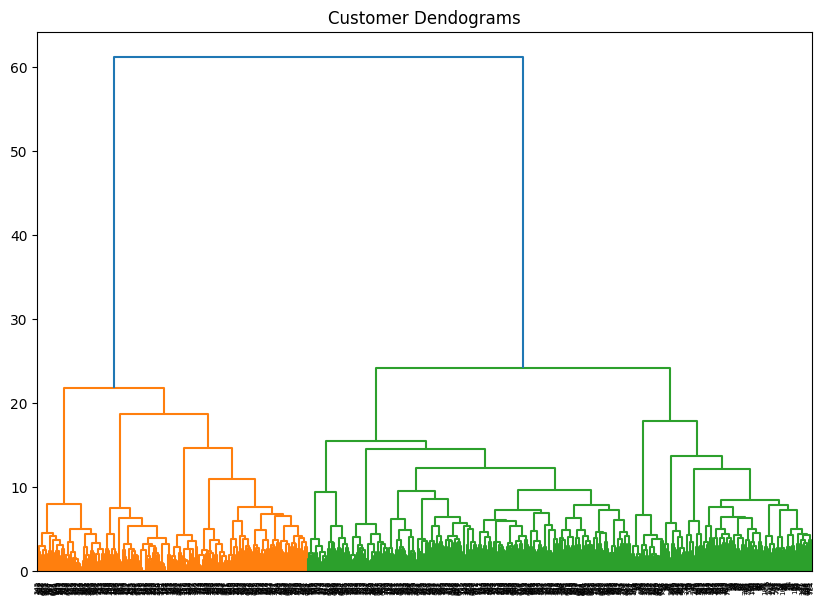

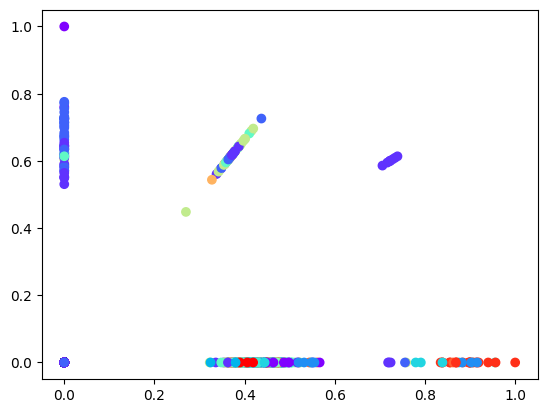

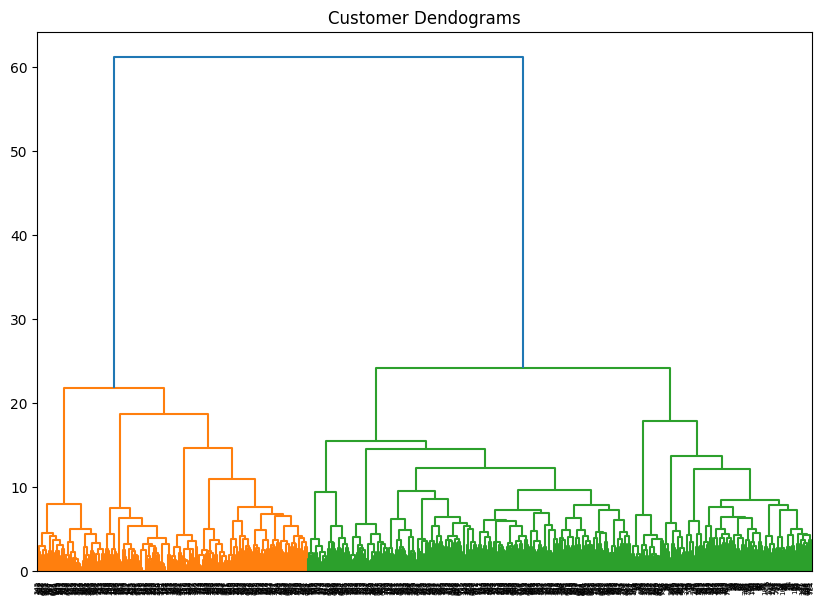

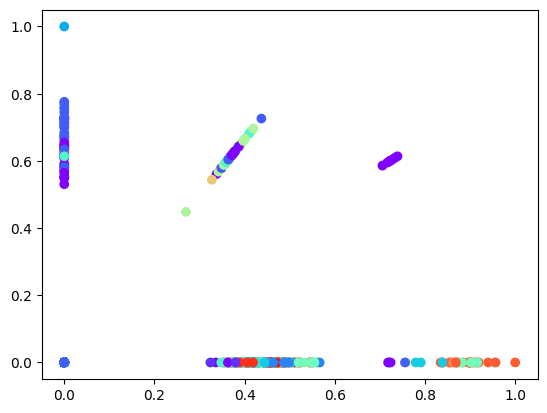

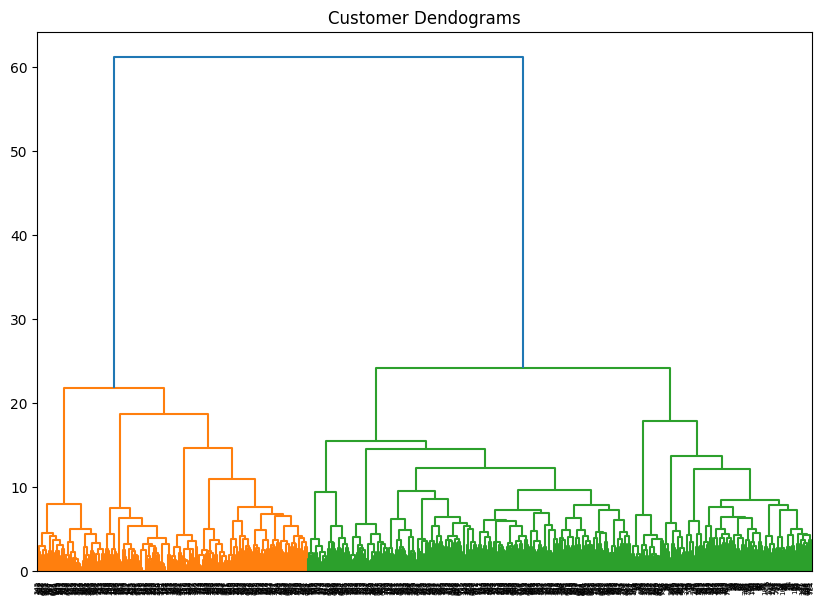

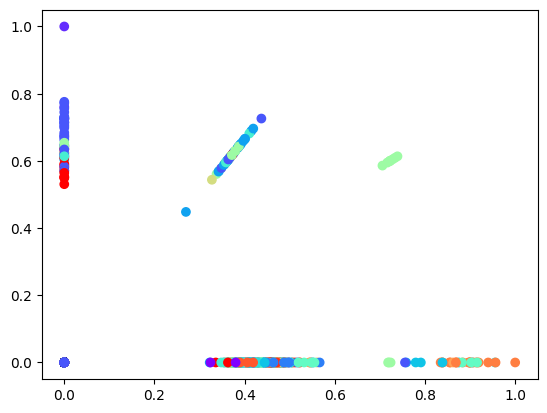

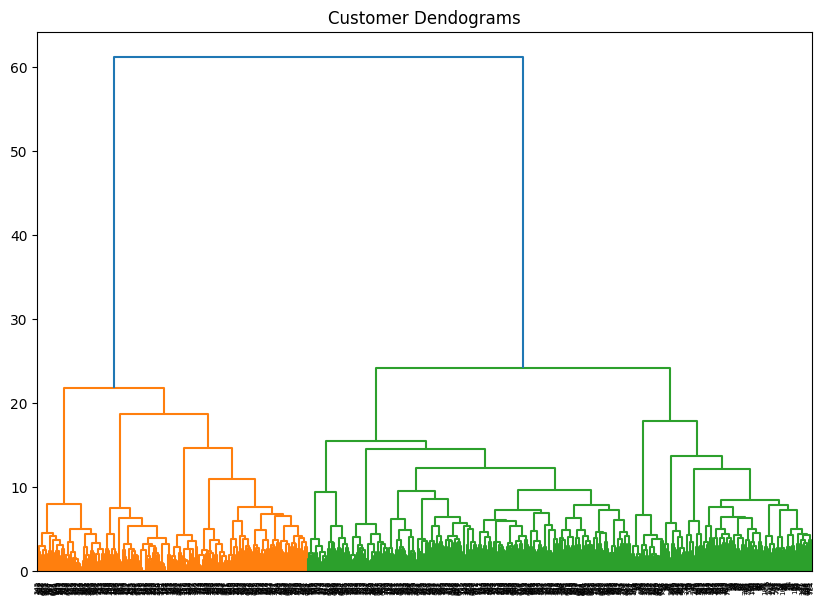

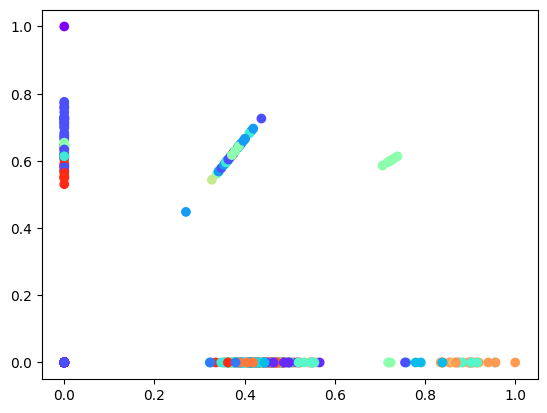

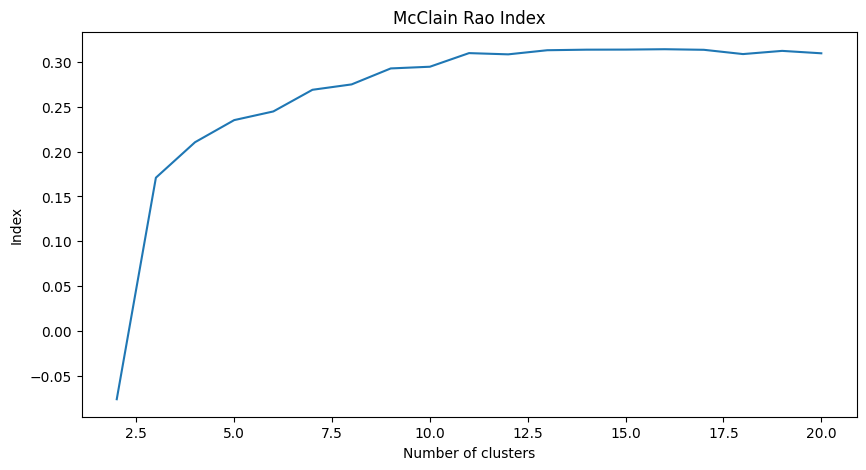

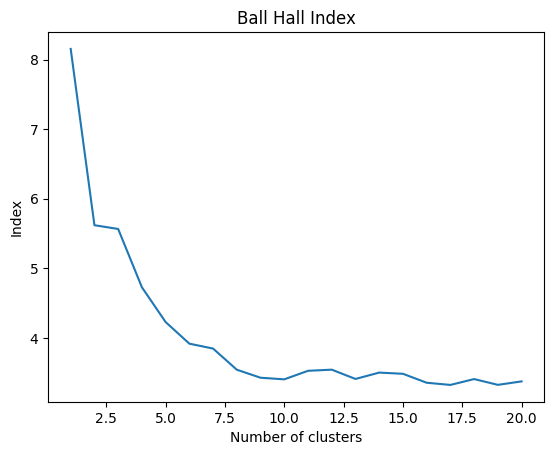

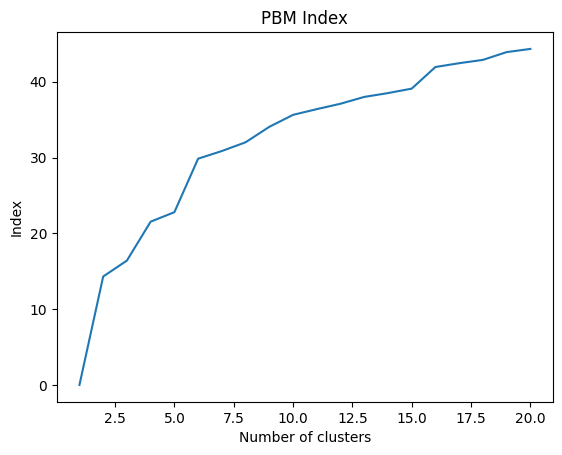

In [18]:
ks=np.linspace(1,20,20)
McClainRidx=[]
BallHallIdx=[]
PBM_idx=[]
for k in ks:
    clusters, cluster = unsp.hierarchical_clustering(data, 'ward', 'euclidean', int(k))
    M,B,P=unsp.calcIndices(data.values, clusters)
    McClainRidx.append(M)
    BallHallIdx.append(B)
    PBM_idx.append(P)


#Plotting the results
plt.figure(figsize=(10,5))
plt.plot(ks, McClainRidx, label='McClain Rao Index')
plt.title('McClain Rao Index')
plt.xlabel('Number of clusters')
plt.ylabel('Index')
plt.show()
plt.plot(ks, BallHallIdx, label='Ball Hall Index')
plt.title('Ball Hall Index')
plt.xlabel('Number of clusters')
plt.ylabel('Index')
plt.show()
plt.plot(ks, PBM_idx, label='PBM Index')
plt.title('PBM Index')
plt.xlabel('Number of clusters')
plt.ylabel('Index')
plt.show()

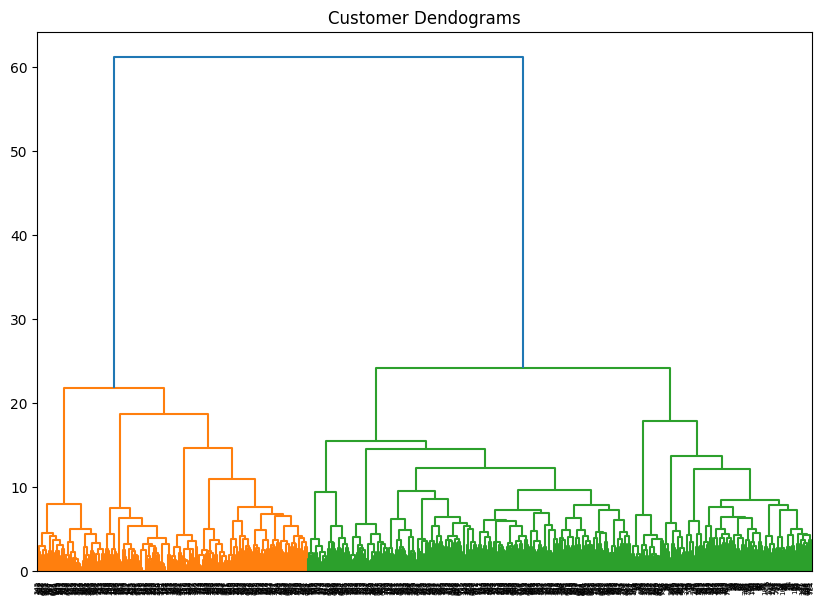

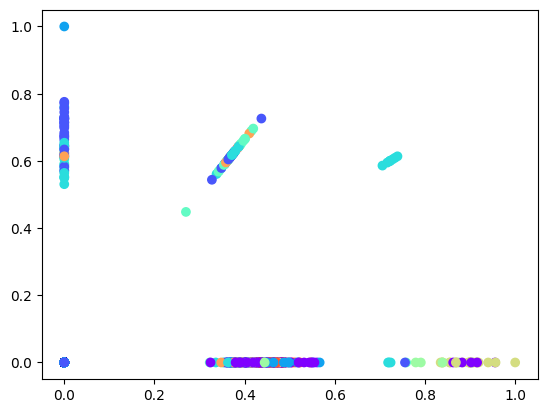

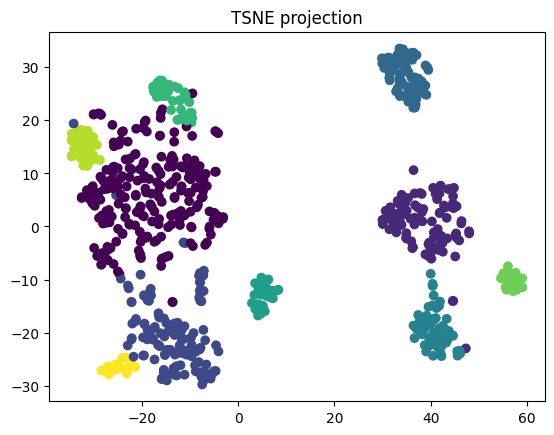

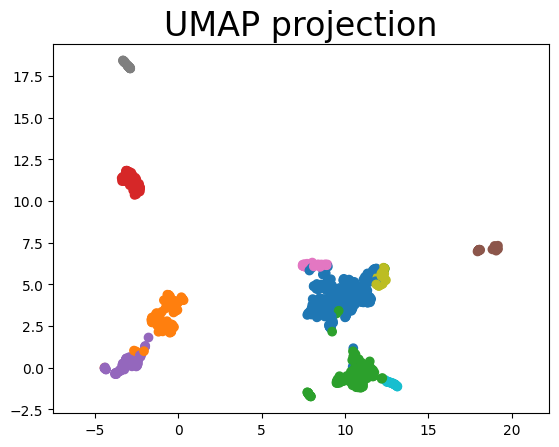

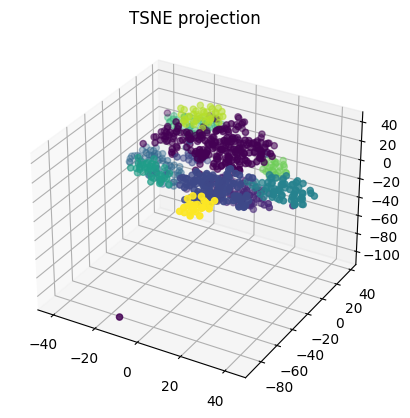

array([[ 13.370093 , -29.910282 , -10.648636 ],
       [-15.598603 , -31.64731  ,  -5.2554426],
       [ 21.253336 , -30.271357 ,  -4.907628 ],
       ...,
       [ 22.193611 ,  22.700745 , -17.711428 ],
       [  5.870275 ,  -5.640562 , -34.36002  ],
       [-34.667606 ,  -2.9489212, -24.962374 ]], dtype=float32)

In [19]:
clusters, cluster = unsp.hierarchical_clustering(data, 'ward', 'euclidean', 10)

#Proyection of the data in 2D using tse and umap
#2D tse
unsp.tsne_manifold(data, 2, 30, 200, c=clusters)
#2D umap
unsp.umap_projection(data.values, clusters)
#3D tse
unsp.tsne_manifold(data, 3, 30, 200, c=clusters)

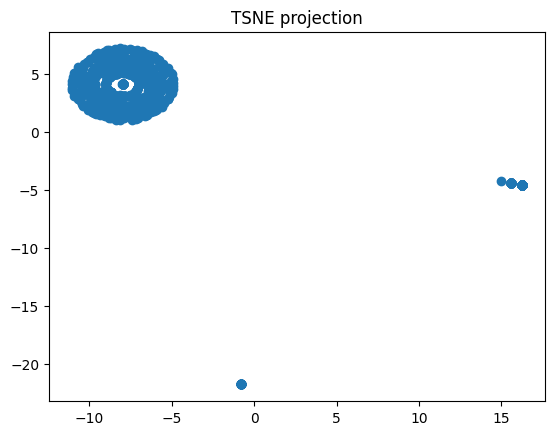

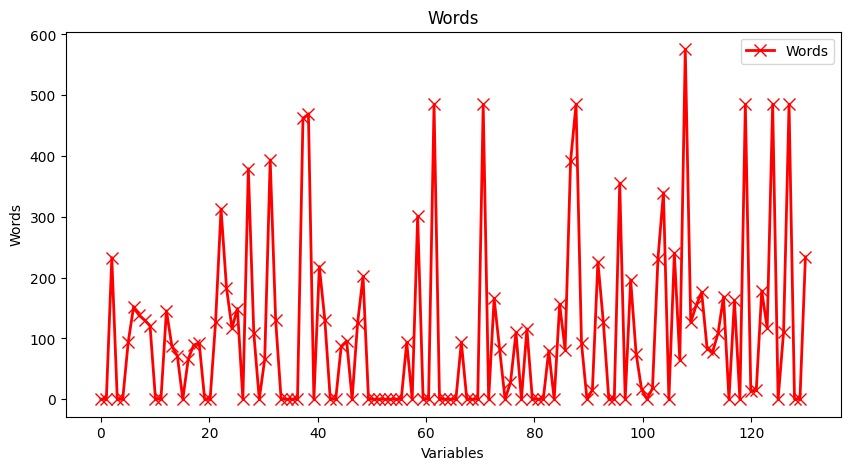

['adecu', 'hemidiafragm', 'vered', 'gomez', 'feb', 'extension', 'expansion', 'evident', 'hr', 'espondilosis', 'ene', 'dorsal', 'dolor']
['opac', 'call', 'may', 'cardiomediastin', 'central', 'compromis', 'imaginologia', 'extensiones', 'telefon', 'rm', 'medellin', 'universitari', 'predomini']


In [20]:
#Find the barycenter of each cluster and plot it
barycenter=[]
for i in range(len(clusters)):
    barycenter.append(np.mean(data.iloc[clusters[i],:],axis=0))
barycenter=np.array(barycenter)

#find the neares register to each baricenter
registers=[]
for i in range(len(barycenter)):
    dist=[]
    for j in range(len(data)):
        dist.append(np.linalg.norm(barycenter[i]-data.iloc[j,:]))
    registers.append(np.argmin(dist))

#Subset of the data with the registers
data_sub=data.iloc[registers,:]

unsp.tsne_manifold(data_sub, 2, 30, 200)

#to sum every column of the data and plot the result for every variable
sums=[]
for i in range(len(data.columns)):
    sums.append(data_sub.iloc[:,i].sum())
plt.figure(figsize=(10,5))
plt.plot(np.linspace(0,len(sums),len(sums)),sums, 'bx-', color='red', label='Words', linewidth=2, markersize=8)
plt.title('Words')
plt.xlabel('Variables')
plt.ylabel('Words')
plt.legend()
plt.show()

#To get the variables with the higher su


#To get the variables with the higher sum
#Get the indexes of the variables with the higher sum
indexes=np.argsort(sums)
#Get the variables with the higher sum
variables=[]
for i in range(len(indexes)):
    variables.append(data_sub.columns[indexes[i]])

print(variables[0:13])
#Printing last 13 variables
print(variables[-13:])

In [8]:
#To generate a txt with all the requirements 
%pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
